In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

%matplotlib inline

In [4]:
def f(x):
    '''Given a scalar x, return some value'''
    y = (x-1.5)**2 + 0.5
    print 'x = {}, y = {}'.format(x,y) # for tracing
    return y

x = [ 2.], y = [ 0.75]
x = [ 2.], y = [ 0.75]
x = [ 2.00000001], y = [ 0.75000001]
x = [ 0.99999999], y = [ 0.75000001]
x = [ 1.5], y = [ 0.5]
x = [ 1.5], y = [ 0.5]
x = [ 1.50000001], y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minimum found at:
X = [ 1.5], Y = [ 0.5]
x = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


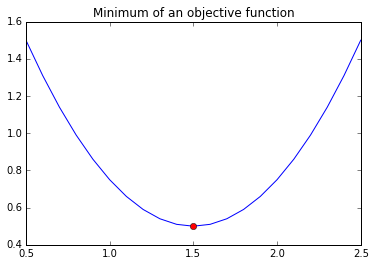

In [5]:
x_guess = 2.0

min_result = spo.minimize(f, x_guess, 
                          method = 'SLSQP', 
                          options = {'disp': True})

print "Minimum found at:"
print 'X = {}, Y = {}'.format(min_result.x, min_result.fun)

# Plot function values, mark minima
Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title('Minimum of an objective function')

Convex problems are easy for optimizers to solve. A real-valued function is convex if a line segment connecting any two points on the graph is above the graph.

To calculate parameters of a model, minimize the absolute error or the sum of squared errors from the predicted values of the model to the actual observed values of the data.

In [17]:
def error(line, data): # error function
    '''Compute error between given line model and observed data
    
    Parameters
    ----------
    line: tuple/list/array (C0, C1) where C0 is slope and C1 is y-intercept
    data: 2D array where each row is an (x,y) point
    
    Returns error as a single real value
    '''
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1]))**2)
    return err

def fit_line(data, error_func):
    '''Fit a line to given data, using a supplied error function.
    
    Parameters
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: function that computes the error between a line and 
    observed data.
    
    Returns line that minimizes the error function.'''
    
    # Generate initial guess for line model
    l = np.float32([0, np.mean(data[:,1])]) # slope = 0, intercept = mean(y)
    
    # Plot initial guess (optional)
    x_ends = np.float32([-5,5])
    plt.plot(x_ends, l[0]* x_ends + l[1], 'm--', linewidth = 2.0, label = 'Initial guess')
    
    # call optimizer to minimize error function
    result = spo.minimize(error_func, l, args=(data,), method = 'SLSQP',
                         options = {'disp': True})
    return result.x
    

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 137.389759492
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 4.11257243315, C1 = -3.11514127584


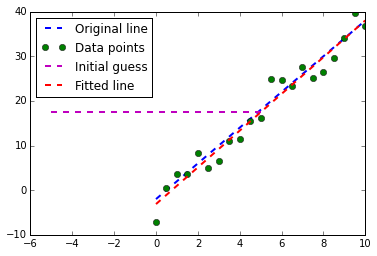

In [21]:
# define original line
l_orig = np.float32([4,2])
print 'Original line: C0 = {}, C1 = {}'.format(l_orig[0], l_orig[1])
Xorig = np.linspace(0,10,21)
Yorig = l_orig[0] * Xorig - l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth = 2.0, label = 'Original line')

# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label = 'Data points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
print 'Fitted line: C0 = {}, C1 = {}'.format(l_fit[0], l_fit[1])
plt.plot(data[:,0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth = 2.0, label = 'Fitted line')

# Add a legend
plt.legend(loc = 'upper left')

In [1]:
# Optimization with constraints and boundaries

import numpy as np
from scipy.optimize import fmin_slsqp as opt
from math import log

def f(x):
    x, y, z = x
    return (x - y + z)**2 + (y - x)**3/(z * log(z))

def constraint_1(x):
    x, y, z = x
    return (x + y - 2*z)

def constraint_2(x):
    x, _, z = x
    return x + z * log(z)

# x = -z * log(z)
# y = 2*z - x
# y = z(2 + log(z))


good_guess = (0.34657359, 0.65342640972, 0.5 )

guess = np.array([0.5, 0.5, 0.5])
bounds = [(-5, 5), (-5, 5), (0.1, 1)]              

print constraint_1(good_guess)
print constraint_2(good_guess)

print"Bad guess:"
print opt(f, guess, bounds = bounds, eqcons = [constraint_1, constraint_2], iprint = 2)
print "Good guess:"
print opt(f, good_guess, bounds = bounds, eqcons = [constraint_1, constraint_2], iprint = 2)

-2.80000023167e-10
-2.7997265617e-10
Bad guess:
  NIT    FC           OBJFUN            GNORM
    1     5     2.500000E-01     1.732051E+00
    2    10    -1.989102E+00     1.148965E+01
    3    16    -3.135898E+00     1.708600E+01
    4    22    -4.649336E+00     2.489237E+01
    5    27    -2.680259E+09     2.188592E+17
    6    42    -2.888741E+04     1.174336E+08
    7    47    -3.247801E+04     1.320311E+08
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32478.0130442
            Iterations: 7
            Function evaluations: 48
            Gradient evaluations: 7
[  2.45949588e-04   1.99926209e+00   9.99754020e-01]
Good guess:
  NIT    FC           OBJFUN            GNORM
    1     5    -4.606130E-02     1.727460E+00
    2    10    -5.372100E+01     8.962764E+02
    3    15    -2.529199E+09     2.151514E+17
    4    30    -1.373916E+05     2.373880E+09
    5    35    -1.381482E+05     2.386957E+09
Optimization terminated successfully. 